# 1.) Pull in Data and Convert ot Monthly

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [29]:
df["Diff"] = df.diff().shift(-1)
df["Target"] = np.sign(df["Diff"])
df["Premium"] = 0.08 * df["Adj Close"]

In [30]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [32]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [33]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [34]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

D:\Users\Xulong\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Users\Xulong\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Users\Xulong\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Users\Xulong\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

# 4.) Add columns, prediction and profits.

In [35]:
df["Predictions"] = y_pred

In [38]:
df["Profits"] = 0.

df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df["Diff"] + df["Premium"]

# 5.) Plot profits over time

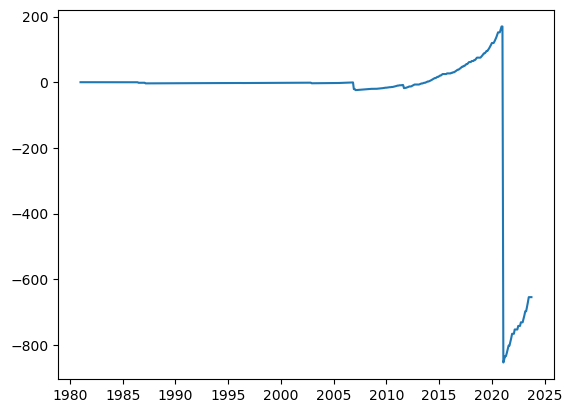

In [39]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

# 5.5) Short write up about how you see your skills valuable to PJ and/or Philip Liu

I believe my skills in coding and my knowledge of finance can bring tangible benefits to PJ and/or Philip Liu. My ability to write code allows me to develop tools that can automate and streamline processes, potentially saving time and reducing errors. Additionally, my understanding of financial markets enables me to provide insightful analyses, which could support informed decision-making and strategy development. I am eager to apply these skills in a practical setting and contribute to the success of the team.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.